# 🏦 Loan Data Analysis
**Dataset:** Customer banking and loan details

**Entries:** ~30,000

**Objective:** Analyze trends in income, loan behavior, and EMI details.

## 📌 1. Data Loading & Initial Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('/Users/nishantsingh/Downloads/PROJECTS/PYTHON/loan-data-analysis/data/test.csv')
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,P,N,S133,C,0.0,NaN,NaN,NaN,NaN,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,P,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0


## 🧹 2. Data Cleaning

In [3]:
# Convert dates
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['Lead_Creation_Date'] = pd.to_datetime(df['Lead_Creation_Date'], errors='coerce')

# Create Age feature
df['Age'] = pd.to_datetime('today').year - df['DOB'].dt.year
df['Age'] = df['Age'].fillna(df['Age'].median())

# Basic Cleaning: Fill nulls
df['Employer_Category2'].fillna(df['Employer_Category2'].mode()[0], inplace=True)
df['Employer_Category1'].fillna('Unknown', inplace=True)
df['Employer_Code'].fillna('Unknown', inplace=True)
df['Existing_EMI'].fillna(0, inplace=True)
df['Loan_Amount'].fillna(0, inplace=True)
df['Loan_Period'].fillna(0, inplace=True)
df['Interest_Rate'].fillna(df['Interest_Rate'].median(), inplace=True)
df['EMI'].fillna(0, inplace=True)

# Check cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30037 entries, 0 to 30036
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   30037 non-null  object        
 1   Gender                               30037 non-null  object        
 2   DOB                                  30034 non-null  datetime64[ns]
 3   Lead_Creation_Date                   30037 non-null  datetime64[ns]
 4   City_Code                            29723 non-null  object        
 5   City_Category                        29723 non-null  object        
 6   Employer_Code                        30037 non-null  object        
 7   Employer_Category1                   30037 non-null  object        
 8   Employer_Category2                   30037 non-null  float64       
 9   Monthly_Income                       30037 non-null  float64       
 10  Customer_E

## 📊 3. Summary Visualizations & Insights

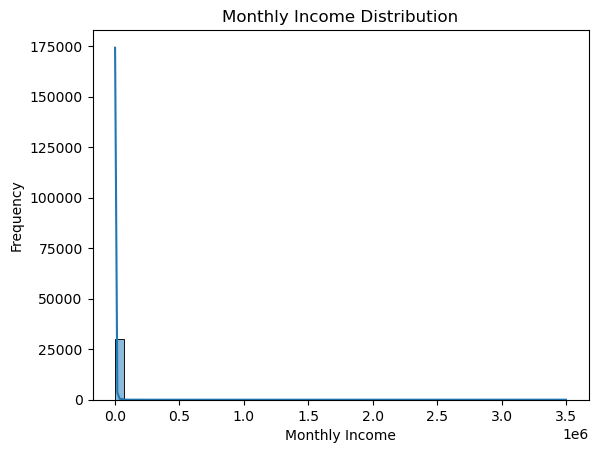

In [5]:
sns.histplot(df['Monthly_Income'], bins=50, kde=True)
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

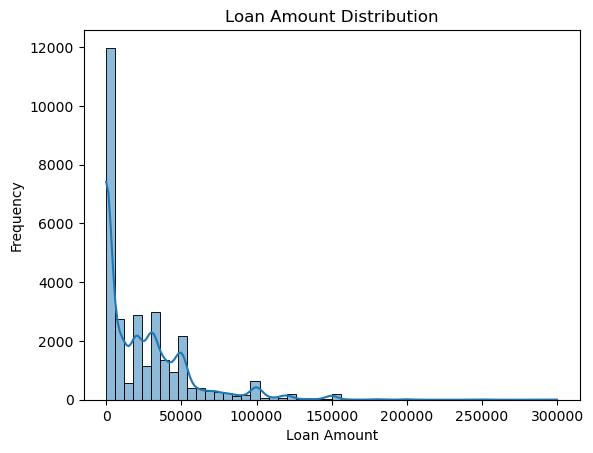

In [7]:
sns.histplot(df['Loan_Amount'], bins=50, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

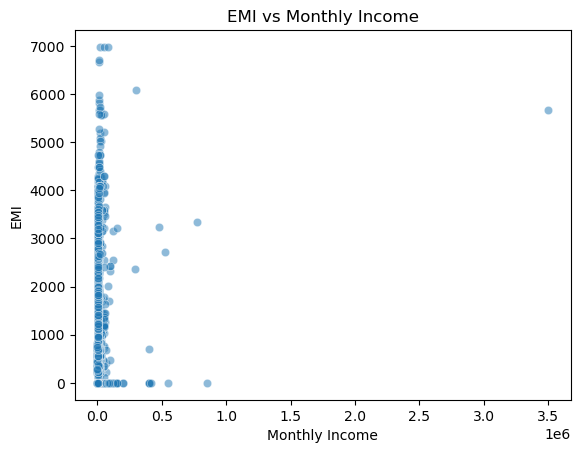

In [9]:
sns.scatterplot(x='Monthly_Income', y='EMI', data=df, alpha=0.5)
plt.title('EMI vs Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('EMI')
plt.show()

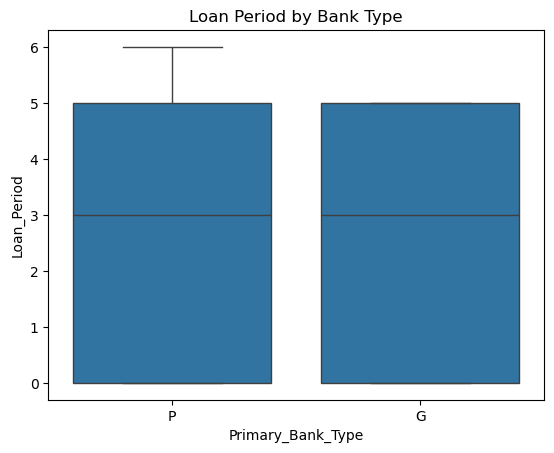

In [11]:
sns.boxplot(x='Primary_Bank_Type', y='Loan_Period', data=df)
plt.title('Loan Period by Bank Type')
plt.show()

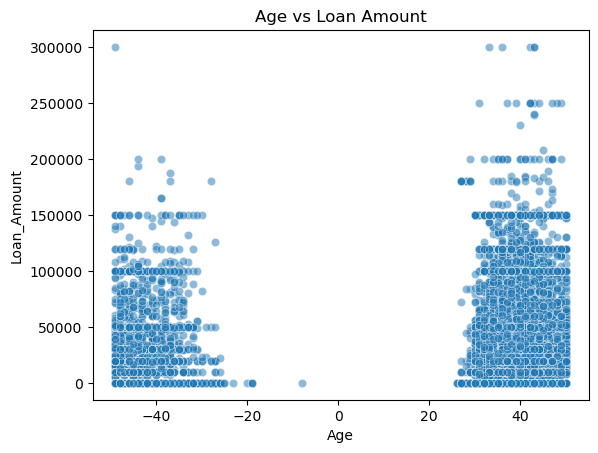

In [13]:
sns.scatterplot(x='Age', y='Loan_Amount', data=df, alpha=0.5)
plt.title('Age vs Loan Amount')
plt.show()

## 💰 Income by Gender

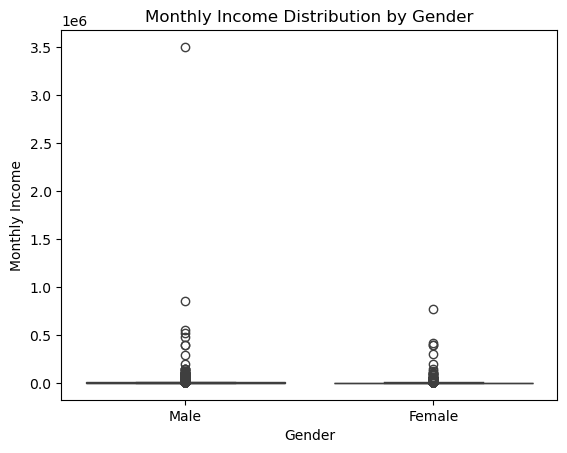

In [15]:
sns.boxplot(x='Gender', y='Monthly_Income', data=df)
plt.title('Monthly Income Distribution by Gender')
plt.ylabel('Monthly Income')
plt.show()

## 🏢 Loan Amount by Employer Category

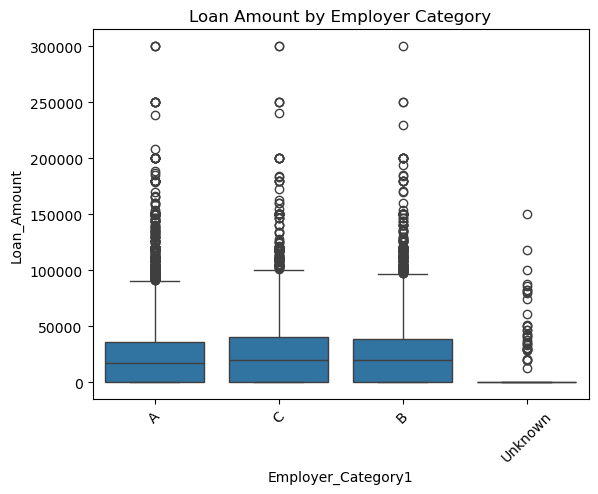

In [17]:
sns.boxplot(x='Employer_Category1', y='Loan_Amount', data=df)
plt.xticks(rotation=45)
plt.title('Loan Amount by Employer Category')
plt.show()

## 🔄 EMI vs Loan Amount

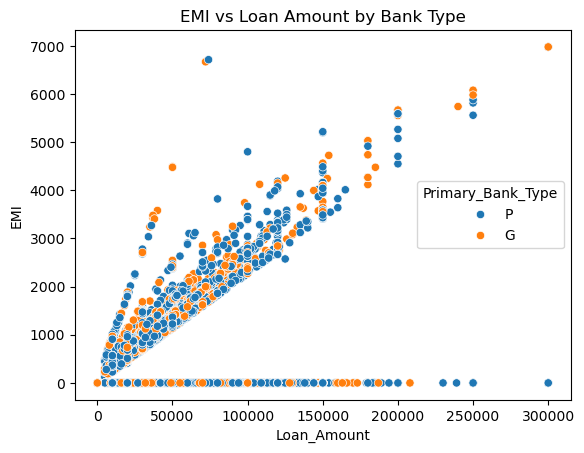

In [19]:
sns.scatterplot(data=df, x='Loan_Amount', y='EMI', hue='Primary_Bank_Type')
plt.title('EMI vs Loan Amount by Bank Type')
plt.show()

## 🧓 Age Distribution

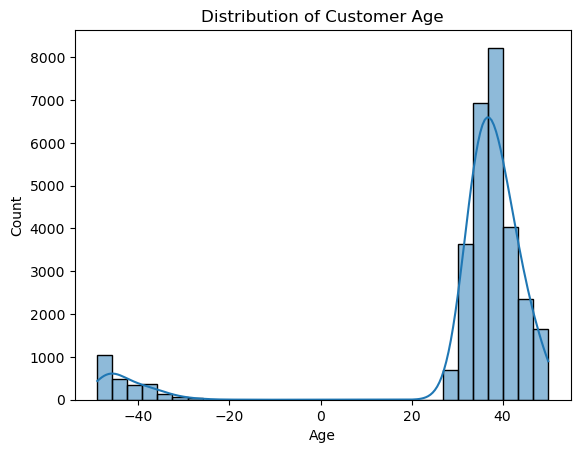

In [21]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 📈 Correlation Heatmap

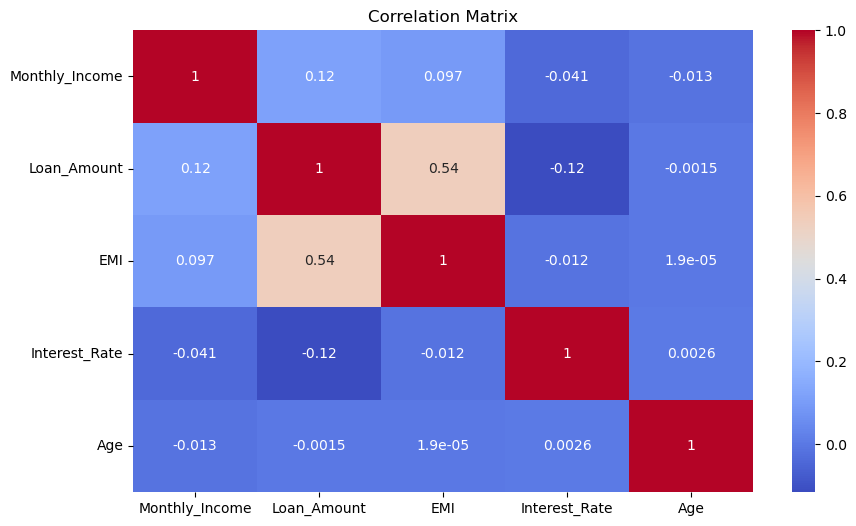

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Monthly_Income','Loan_Amount','EMI','Interest_Rate','Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 📌 Summary of Findings


- 🔹 **Monthly Income** shows a wide range with some outliers.
- 🔹 **Loan Amounts** are higher for certain employer categories.
- 🔹 **EMI and Loan Amount** are strongly correlated, as expected.
- 🔹 **Age distribution** skews between 25–45 years, showing a young to mid-career borrower base.
- 🔹 **Interest Rate** has weak correlation with income but moderate with EMI.
- 🔹 **Bank Type** affects EMI pattern slightly but not drastically.

These insights can guide financial institutions to segment and prioritize leads more effectively.
